## 개요 ##


- 비지도 학습과 군집의 개념 사용.
- 군집를 이용한 머신러닝 알고리즘 중 k-Means 이용.


###군집과 K-means ##


- 비지도 학습 : 문제는 알려주되 정답(레이블)은 알려주지 않음
(여러 데이터를 학습함으로써 미처 알지 못했던 것을 발견하는 데 목적)
- 군집 : 유사도가 높은 집단끼리 그룹을 만들고 분류된 그룹 간 특징을 파악하는 분석 방법
- K-means : 군집의 개수를 정하는 알고리즘 (가장 많이 사용)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('logistic.csv')
df.head()

,Num,Latitude,Longitude
0,1,37.336803,126.712836
1,2,37.501303,126.787808
2,3,37.522501,126.777363
3,4,37.511178,126.743209
4,5,37.508776,126.738469


In [4]:
# 정보 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Num        371 non-null    int64  
 1   Latitude   371 non-null    float64
 2   Longitude  371 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 8.8 KB


In [5]:
df.describe()

,Num,Latitude,Longitude
count,371.000000,371.000000,371.000000
mean,186.000000,37.435040,126.723084
std,107.242715,0.081053,0.076768
min,1.000000,37.279467,126.439616
25%,93.500000,37.350043,126.683930
50%,186.000000,37.459941,126.724375
75%,278.500000,37.504216,126.777753
max,371.000000,37.554406,126.869714


In [6]:
df.isnull().sum()

Num          0
Latitude     0
Longitude    0
dtype: int64

In [7]:
# 넘파이 배열로 만들고 의미 없는 일련번호를 뺸 위도와 경도만 불러서 X 에 저장 

XY = np.array(df)

X = XY[:, 1:] # 모든 rows 선택 1번 cols 제외    
X[:10]

array([[ 37.336803, 126.712836],
       [ 37.501303, 126.787808],
       [ 37.522501, 126.777363],
       [ 37.511178, 126.743209],
       [ 37.508776, 126.738469],
       [ 37.528486, 126.741476],
       [ 37.510999, 126.778994],
       [ 37.529438, 126.742163],
       [ 37.516358, 126.734111],
       [ 37.513337, 126.734624]])

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

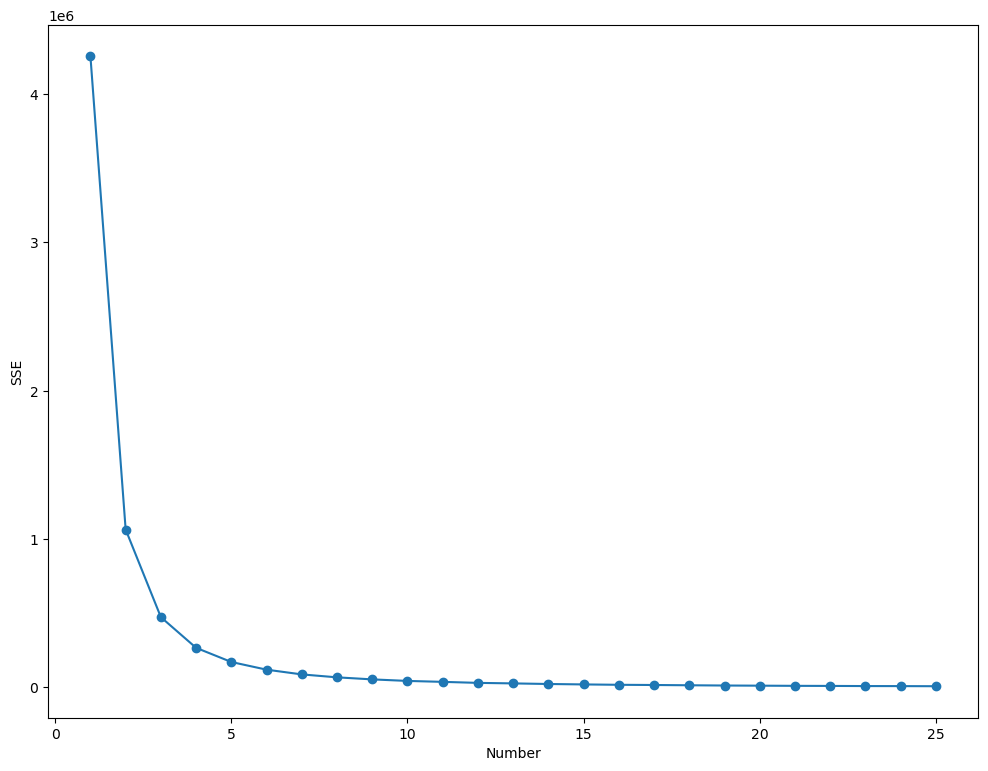

In [8]:
# K 평균 알고리즘의 엘보우 기법을 이용하여 최적 군집점 개수 수집 
# KMeans() 메서드를 사용하고, fit() 로 X 데이터 학습 
# KMeans() 클러스터 내 오차 제곱합 인 sse.append()의 inertia_ 로 시각화 


from sklearn.cluster import KMeans

def elbow(X ,n):
    sse = []
    
    for i in range(1, n+1):
        km = KMeans(n_clusters=i)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.figure(figsize=(12,9))
    plt.plot(range(1, 1+n), sse, marker='o')
    plt.xlabel('Number')
    plt.ylabel('SSE')
    plt.show()
    
elbow(df,25)

# 결과를 보면 군집점이 3~6개 일떄 최적의 군집점 개수로 평가되고, 이중 5개 클러스터 사용 

In [9]:
# 군집점 생성 시각화 
# 택배 수치 데이터가 저장된 X 에서 군집점을 랜덤으로 골라서 C_x, C_y 변수에 저장 
# 택배 데이터에서 군집점을 고르지 않을 경우 터무니 없는 숫자가 나와 군집점이 너무 멀거나 표시하기 힘든 점이 
# 생성될수 있어서 X 데이터 내에서 선정 
# C_x, C,y 는 zip()함수를 이용하여 5개의 위도, 경도로 이뤄진 군집점 데이터로 합친다.

k=5

C_x = np.random.choice(X[:,0],k) # 0col 에서 5개 
C_y = np.random.choice(X[:,1],k) # 1col에서 5개 
C = np.array(list(zip(C_x, C_y)))

print(C)


[[ 37.378693 126.705922]
 [ 37.513674 126.842546]
 [ 37.44335  126.650857]
 [ 37.490128 126.694656]
 [ 37.513337 126.813751]]


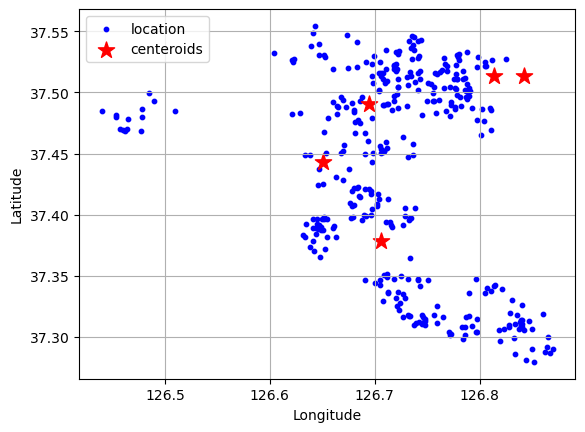

In [12]:
# 군집점과 원래 데이터의 위치를 시각화 
lat = df['Latitude']
lon = df['Longitude']
plt.xlabel('Longitude')
plt.ylabel("Latitude")
plt.scatter(lon,lat, c='blue', s=10, label='location')
plt.scatter(C_y,C_x, marker='*', s=150, c='red', label='centeroids')
plt.legend()
plt.grid()
plt.show()

In [17]:
# 초기 설정하기
# k-Means의 과정은 모든 데이터의 거리를 계산하여 가까운 군집에 그룹을 할당하고 각 군집에 속한 데이터의 평균을
# 계산하여 군집의 중심을 갱신하기 때문에 거리를 구하는 함수를 설정
# 거리 함수는 유클리드 거리 공식을 이용:

def distance(A,B):
    return np.sqrt(np.sum(np.power((A-B),2)))  # (스꼴라 제곱) 제곱 

#[ [(A-B)2제곱 ] 제곱근 

# 예시 
# value = 4
# np.sqrt(value)
# 2.0

#np.power(4,2) 4 제곱 
# p.power(27, 1/3) 27의 세제곱근 

In [18]:
# C_old 변수를 만들고 군집점 5개를 담고 있는 배열과 크기가 같은 영행렬 생성 
# 이들 행렬을 군집점으로 갱신할 떄마다 이전 군집점 좌표를 저장 
# clusters 변수는 전체 좌표 데이터와 크기가 같은 영행렬, flag는 군집점들과 이전 군집점들과의 거리를 저장 

C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))
flag = distance(C, C_old) 

print(C_old)
print(flag)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
295.5272103597839


In [21]:
# 군집을 통해 섬과 바다를 고려하기 힘들기 떄문에 영종도에 해당하는 좌표 
# 한 개를 군집점으로 설정하고 나머지 4개를 랜덤으로 설정하여 최적화 도움을 준다. 
C_island = (37.48, 126.4)  # 영종도 위치
C_x = np.random.choice(X[:, 0], k - 1)  # 0col 에서 5개
C_y = np.random.choice(X[:, 1], k - 1)  # 1col에서 5개
C = list(zip(C_x, C_y))
C.append(C_island)
C = np.array(C)
print(C)


[[ 37.418995 126.648319]
 [ 37.534831 126.746154]
 [ 37.537745 126.789893]
 [ 37.529236 126.759565]
 [ 37.48     126.4     ]]


C:\Users\3호실-09\AppData\Local\Temp\ipykernel_14740\1192737412.py:51: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


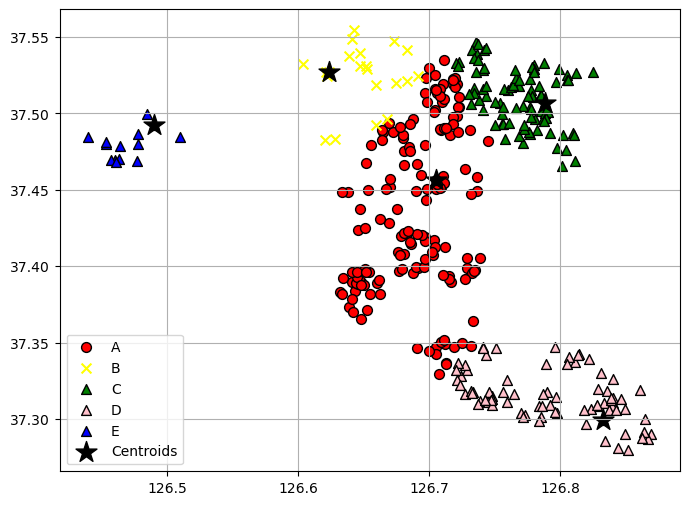

In [22]:
# k-Means 실행하기
# 최적의 군집점이라면 군집점이 움직이지 않을 것이고 군집점들과 이전 군집점들 간의 거리가
# 0이 되므로 flag가 0이 될 때까지 k-Means를 반복하여 모든 좌표의 군집을 구한다.


# 1) 모든 택배 좌표와 5개의 군집점까지의 거리를 구하기
# 2) 가장 가까운 군집점에 해당하는 군집으로 분류
# 3) 이 시점의 군집점들은 C_old에 저장
# 4) 분류된 군집에서 군집 내 좌표들의 중심을 다시 군집점 설정
# 5) 군집점이 갱신되었으므로 flag 또한 갱신되어 작업을 반복


from copy import deepcopy


distances = []
while flag != 0:
    for i in range(len(X)):
        for j in range(k):
            temp = distance(X[i], C[j])
            distances.append(temp)
        cluster = np.argmin(distances)
        clusters[i] = cluster
        distances = []

    C_old = deepcopy(C)

    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        for r in range(len(points)):
            C[i][0] = np.mean(points[r][0])
            C[i][1] = np.mean(points[r][1])

    flag = distance(C, C_old)


# X[clusters==k,1]와 X[clusters==k,0]에 위치 데이터가 있으며 k가 0~4까지 속해 있는 군집을 의미한다.
# 이들은 색깔(red, yellow, green, pink, blue)을 다르게 하여 표시


plt.figure(figsize=(8, 6))
plt.scatter(
    X[clusters == 0, 1],
    X[clusters == 0, 0],
    s=50,
    c="red",
    marker="o",
    edgecolor="black",
    label="A",
)
plt.scatter(
    X[clusters == 1, 1],
    X[clusters == 1, 0],
    s=50,
    c="yellow",
    marker="x",
    edgecolor="black",
    label="B",
)
plt.scatter(
    X[clusters == 2, 1],
    X[clusters == 2, 0],
    s=50,
    c="green",
    marker="^",
    edgecolor="black",
    label="C",
)
plt.scatter(
    X[clusters == 3, 1],
    X[clusters == 3, 0],
    s=50,
    c="pink",
    marker="^",
    edgecolor="black",
    label="D",
)
plt.scatter(
    X[clusters == 4, 1],
    X[clusters == 4, 0],
    s=50,
    c="blue",
    marker="^",
    edgecolor="black",
    label="E",
)
plt.scatter(
    C[:, 1], C[:, 0], s=250, marker="*", c="black", edgecolor="black", label="Centroids"
)
plt.legend()
plt.grid()
plt.show()


In [24]:
# 지도에 표시하기 
# 파이선 지도 시각화 라이브러리 호출 folium 

import folium as gm

g_map = gm.Map(location=[37.42,126.60], zoom_start=12)
g_map

In [35]:
# 지도에 택배 위치 데이터 표시 
# n_color 변수 안에 다섯가지 색깔을 지정 
# CircleMarker() method는 지도에 원으로 위치를 표시 
# X[cluster==i, 0][j] 는 i 번쨰 해당하는 군집의 위도 , X[cluster==i, 1][j]는 경도 
# radius는 반지름 

m_color = ["red", "blue", "green", "purple", "orange"]

for i in range(k):  # 군집점 반복
    for j in range(len(X[clusters == i, 1])):  # 경도의 갯수만큼 반복
        marker = gm.CircleMarker(
            [X[clusters == i, 0][j], X[clusters == i, 1][j]], radius=3, color=m_color[i]
        )
        marker.add_to(g_map)

g_map


In [32]:
# 군집점 과 군집 영역 표시하기 
#Marker()함수에 C 위도 경도 입력 
# 군집점아이콘을 별로 색 검정 
# 군집 이므로 반지름을 150으로 크게 설정 

for i in range(len(C)):
    marker = gm.Marker([C[i][0],C[i][1]], popup="Kmeans points", icon=gm.Icon(icon='star', color='black'))
    marker.add_to(g_map)

g_map


In [34]:
for i in range(len(C)):
    marker = gm.CircleMarker([C[i][0],C[i][1]], popup="Kmeans area", color=m_color[i], fill_color=m_color[i],radius=150 )
    marker.add_to(g_map)
    
g_map